# 11 Pontos de Precisão e Recall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\a239277\AppData\Local\Temp\ipykernel_25444\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
result = pd.read_csv('../resultados_sem_stemmer/RESULTADOS-NOSTEMMER.csv', sep=';')
result['Position'] = result['Results'].str.split(', ', expand=True)[0].str[1:]
result['DocNumber'] = result['Results'].str.split(', ', expand=True)[1]
result['Relevance'] = result['Results'].str.split(', ', expand=True)[2].str[:-1]
result.drop(columns=['Results'], inplace=True)
result

,QueryNumber,Position,DocNumber,Relevance
0,1,1.0,40,0.07736125211124294
1,1,2.0,971,0.050234117172333045
2,1,3.0,302,0.047962021158067886
3,1,4.0,1188,0.046768682198753596
4,1,5.0,392,0.046238516757099904
...,...,...,...,...
120280,100,1211.0,1230,0.0008328031501789552
120281,100,1212.0,974,0.0005873420398677124
120282,100,1213.0,948,0.0005235496427597196
120283,100,1214.0,940,0.0004357997398344579


In [3]:
result_stemmer = pd.read_csv('../resultados_com_stemmer/RESULTADOS-STEMMER.csv', sep=';')
result_stemmer['Position'] = result_stemmer['Results'].str.split(', ', expand=True)[0].str[1:]
result_stemmer['DocNumber'] = result_stemmer['Results'].str.split(', ', expand=True)[1]
result_stemmer['Relevance'] = result_stemmer['Results'].str.split(', ', expand=True)[2].str[:-1]
result_stemmer.drop(columns=['Results'], inplace=True)
result_stemmer

,QueryNumber,Position,DocNumber,Relevance
0,1,1.0,40,0.07565648960798238
1,1,2.0,971,0.048856105525199256
2,1,3.0,392,0.04711830903336669
3,1,4.0,1026,0.04371218236054627
4,1,5.0,302,0.043700336931355756
...,...,...,...,...
120280,100,1211.0,547,0.0008780403865268196
120281,100,1212.0,1230,0.0008363791324622214
120282,100,1213.0,974,0.0005898640340848728
120283,100,1214.0,948,0.0005257977181260492


In [28]:
esperados = pd.read_csv('../resultados_sem_stemmer/esperados.csv', sep=';')
esperados['Relevance'] = esperados['DocVotes']/8
esperados

,QueryNumber,DocNumber,DocVotes,Relevance
0,1,139,7,0.875
1,1,151,6,0.750
2,1,166,1,0.125
3,1,311,1,0.125
4,1,370,2,0.250
...,...,...,...,...
4815,100,1000,6,0.750
4816,100,1017,7,0.875
4817,100,1033,1,0.125
4818,100,1097,2,0.250


## NoStemmer and Stemmer

In [5]:
def precision_recall(stemmer):


    queries = esperados['QueryNumber'].unique()
    precision = {}
    recall = {}

    for i in range(11):
        precision[i] = []
        recall[i] = []

    if stemmer == False:

        for query in queries:
            relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
            results = result[result['QueryNumber'] == query]['DocNumber']
            for i in range(11):
                results_until_i = results[:(i+1)*len(results)//11].astype(int)
                same_elements = np.intersect1d(relevant_documents, results_until_i)
            
                precision[i].append(len(same_elements)/len(results_until_i))
                recall[i].append(len(same_elements)/len(relevant_documents))
    else: 
        
        for query in queries:
            relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
            results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber']
            for i in range(11):
                results_until_i = results[:(i+1)*len(results)//11].astype(int)
                same_elements = np.intersect1d(relevant_documents, results_until_i)
            
                precision[i].append(len(same_elements)/len(results_until_i))
                recall[i].append(len(same_elements)/len(relevant_documents))

    # Calculate mean precision and recall
    mean_precision = {}
    mean_recall = {}

    for i in range(11):
        mean_precision[i] = np.mean(precision[i])
        mean_recall[i] = np.mean(recall[i])


    # Plot precision x recall
    plt.scatter(mean_recall.values(), mean_precision.values())
    plt.title('Gráfico de 11 pontos de precisão e recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

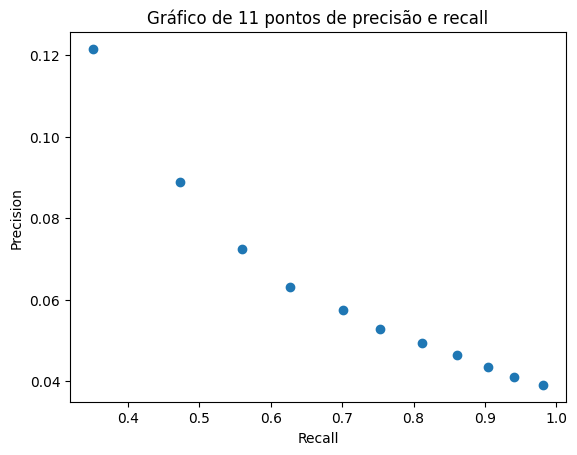

In [6]:
precision_recall(stemmer=True)

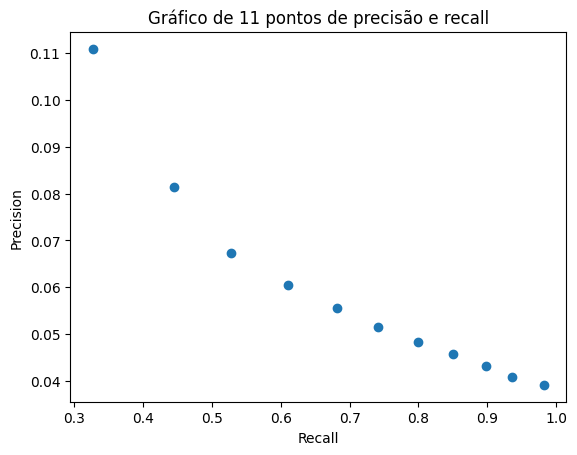

In [7]:
precision_recall(stemmer=False)

# F1 Score - Até o 10° documento encontrado

In [8]:
def f1_score(stemmer):
    queries = esperados['QueryNumber'].unique()
    precision = []
    recall = []
    for query in queries:
        relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
        if stemmer == False:
            best_results = result[result['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        else:
            best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        same_elements = np.intersect1d(relevant_documents, best_results)
        precision.append(len(same_elements)/len(best_results))
        recall.append(len(same_elements)/len(relevant_documents))

    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)

    f1 = 2 * (mean_precision * mean_recall) / (mean_precision + mean_recall)
    return f1

In [9]:
f1_score(stemmer=False)

0.14602747503622696

In [10]:
f1_score(stemmer=True)

0.1606587444569522

# Precision at 5

In [11]:
def precision_at_5(stemmer):
    queries = esperados['QueryNumber'].unique()
    precision = []
    for query in queries:
        relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
        if stemmer == False:
            best_results = result[result['QueryNumber'] == query]['DocNumber'][:5].astype(int)
        else:
            best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'][:5].astype(int)
        same_elements = np.intersect1d(relevant_documents, best_results)
        precision.append(len(same_elements)/len(best_results))

    mean_precision = np.mean(precision)

    return mean_precision

In [12]:
precision_at_5(stemmer=False)

0.3434343434343435

In [13]:
precision_at_5(stemmer=True)

0.3858585858585859

# Precision at 10

In [14]:
def precision_at_10(stemmer):
    queries = esperados['QueryNumber'].unique()
    precision = []
    for query in queries:
        relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
        if stemmer == False:
            best_results = result[result['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        else:
            best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        same_elements = np.intersect1d(relevant_documents, best_results)
        precision.append(len(same_elements)/len(best_results))

    mean_precision = np.mean(precision)

    return mean_precision

In [15]:
precision_at_10(stemmer=False)

0.28080808080808084

In [16]:
precision_at_10(stemmer=True)

0.31010101010101015

# R-Precision Histogram

In [17]:
def r_precision_histogram():
    queries = esperados['QueryNumber'].unique()
    r_precision = {}
    for query in queries:
        relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']

        best_results = result[result['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        best_results_stemmer = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'][:10].astype(int)

        same_elements = np.intersect1d(relevant_documents, best_results)
        same_elements_stemmer = np.intersect1d(relevant_documents, best_results_stemmer)

        precision = len(same_elements)/len(best_results)
        precision_stemmer = len(same_elements_stemmer)/len(best_results_stemmer)

        r_precision[query] = precision - precision_stemmer

    # Make histogram
    plt.bar(r_precision.keys(), r_precision.values())
    plt.title('Histograma de R-Precision Stemmer vs No Stemmer')
    plt.xlabel('Query Number')
    plt.ylabel('R-Precision No Stemmer - R-Precision Stemmer')

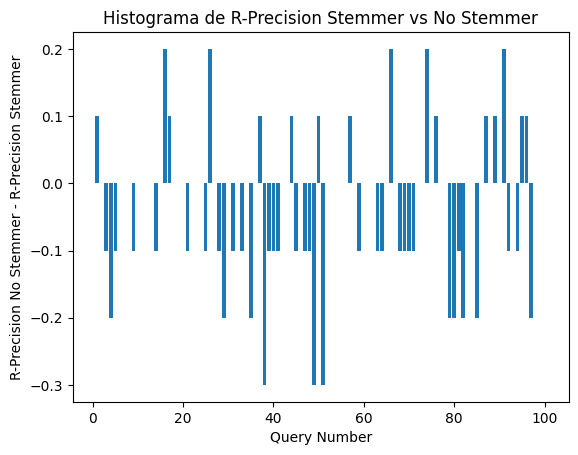

In [18]:
r_precision_histogram()

# MAP

In [32]:
def calculate_map(stemmer):
    queries = esperados['QueryNumber'].unique()
    overal_aps = []
    for query in queries:
        relevant_documents = set(esperados[esperados['QueryNumber'] == query]['DocNumber'])
        
        if stemmer == False:
            best_results = result[result['QueryNumber'] == query]['DocNumber'][:10].astype(int)
        else:
            best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'][:10].astype(int)

        gtp = 0
        sum_precision = 0
        retrived_documents_until_k = 0
        for k in range(len(best_results)):
            if best_results.iloc[k] in relevant_documents:
                gtp += 1
                retrived_documents_until_k += 1
                sum_precision += retrived_documents_until_k/(k+1)
        if gtp != 0:
            overal_aps.append(sum_precision/gtp)
        else:
            overal_aps.append(0)
        
    mean_ap = np.mean(overal_aps)
    return mean_ap


In [33]:
calculate_map(stemmer=False)

0.5474229667549774

In [34]:
calculate_map(stemmer=True)

0.5906580401520878

# MRR

In [22]:
def calculate_mrr(stemmer):

    queries = esperados['QueryNumber'].unique()
    sum_mrr = 0
    for query in queries:
        relevant_documents = set(esperados[esperados['QueryNumber'] == query]['DocNumber'])
            
        if stemmer == False:
            best_results = result[result['QueryNumber'] == query]['DocNumber'].astype(int)
        else:
            best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'].astype(int)
        
        for doc_retrieved in best_results:
            if doc_retrieved in relevant_documents:
                index_doc_retrieved = best_results.tolist().index(doc_retrieved)
                sum_mrr += 1/(index_doc_retrieved+1)
                break

    mrr = sum_mrr/len(queries)
    return mrr


In [23]:
calculate_mrr(stemmer=False)

0.6371087843575882

In [24]:
calculate_mrr(stemmer=True)

0.6782335199243413

# Discounted Cumulative Gain (médio)

In [29]:
queries = esperados['QueryNumber'].unique()
stemmer = False
dcgs_from_queries = []
for query in queries:
    dcg = 0
    relevant_documents = esperados[esperados['QueryNumber'] == query]['DocNumber']
    relevant_documents_relevance = esperados[esperados['QueryNumber'] == query]['Relevance']    
    if stemmer == False:
        best_results = result[result['QueryNumber'] == query]['DocNumber'].astype(int)
    else:
        best_results = result_stemmer[result_stemmer['QueryNumber'] == query]['DocNumber'].astype(int)

    for doc_retrieved in best_results:
        if doc_retrieved in relevant_documents.values:
            relevance = relevant_documents_relevance.iloc[relevant_documents.tolist().index(doc_retrieved)]
            dcg += (2 ** relevance - 1)/np.log2(best_results.tolist().index(doc_retrieved) + 2)
    dcgs_from_queries.append(dcg)

mean_dcg = np.mean(dcgs_from_queries)

In [31]:
mean_dcg

2.815054191177485

In [216]:
relevant_documents_votes

0     7
1     6
2     1
3     1
4     2
5     1
6     1
7     2
8     7
9     1
10    5
11    2
12    1
13    1
14    2
15    1
16    3
17    2
18    8
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    5
28    1
29    2
30    2
31    1
32    1
33    1
Name: DocVotes, dtype: int64